### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
import itertools
sns.set()

In [3]:
import os
import glob
import impyute as impy

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Loading and Transforming the Data

In [5]:
path = "/Users/satavisha/anaconda3/envs/timeseries/TimeSeries/J&J Hackathon 2021/forecast_train_data/"

In [6]:
raw_files = glob.glob(path + "*.csv")
raw_files

['/Users/satavisha/anaconda3/envs/timeseries/TimeSeries/J&J Hackathon 2021/forecast_train_data/hackers_train_1.csv',
 '/Users/satavisha/anaconda3/envs/timeseries/TimeSeries/J&J Hackathon 2021/forecast_train_data/hackers_train_2.csv',
 '/Users/satavisha/anaconda3/envs/timeseries/TimeSeries/J&J Hackathon 2021/forecast_train_data/hackers_train_3.csv']

In [7]:
li = []
for filename in raw_files:
    df_ts = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_ts)

In [8]:
df = pd.concat(li, axis = 0, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973819 entries, 0 to 8973818
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   RecordID               int64  
 2   vics_bol_num           object 
 3   shpmt_doc_num          float64
 4   purch_ord_num          object 
 5   sls_ord_num            int64  
 6   dlvry_doc_num          int64  
 7   sold_to_num            int64  
 8   ship_to_num            int64  
 9   matl_num               int64  
 10  invc_num               int64  
 11  sls_doc_typ            object 
 12  plant_cd               object 
 13  tms_load_id            object 
 14  invc_create_dt         object 
 15  sls_itm_subtotal_3     float64
 16  sls_itm_catg           object 
 17  invc_itm_gross_weight  float64
 18  invc_itm_volume        float64
 19  DisplayItemFlag        int64  
 20  ct_match               object 
 21  line_ct_charges        float64
 22  line_glo_charges  

In [10]:
df.invc_create_dt.head()

0    2019-12-30
1    2019-12-30
2    2019-12-30
3    2019-12-30
4    2019-12-30
Name: invc_create_dt, dtype: object

In [11]:
df.invc_create_dt.tail()

8973814    2021-01-27
8973815    2021-01-27
8973816    2021-01-27
8973817    2021-01-27
8973818    2021-01-27
Name: invc_create_dt, dtype: object

In [12]:
df.invc_create_dt = pd.to_datetime(df.invc_create_dt)

In [13]:
df.fiscal_yr_mo = pd.to_datetime(df.fiscal_yr_mo)

In [14]:
df_ts = df.copy()

In [15]:
df_ts.head()

,Unnamed: 0,RecordID,vics_bol_num,shpmt_doc_num,purch_ord_num,sls_ord_num,dlvry_doc_num,sold_to_num,ship_to_num,matl_num,...,invc_itm_gross_weight,invc_itm_volume,DisplayItemFlag,ct_match,line_ct_charges,line_glo_charges,fiscal_yr_mo,kc_trim,invc_qty_ea,invc_qty_cs
0,0,1,3813714083382997,1823014.0,6KBP1JOG,16987272,87569406,40002164,40036679,111672475,...,2088.00,69.774,0,y,20.42611,16.55967,2020-01-01,48176901,2088.0,174.0
1,1,2,3813714083382997,1823014.0,6KBP1JOG,16987272,87569406,40002164,40036679,111747900,...,2952.75,111.760,0,y,28.88563,23.41789,2020-01-01,48176901,1524.0,127.0
2,2,3,3813714083382997,1823014.0,6KBP1JOG,16987272,87569406,40002164,40036679,111756100,...,1951.60,73.718,0,y,19.09176,15.47790,2020-01-01,48176901,984.0,82.0
3,3,4,3813714083382997,1823014.0,6KBP1JOG,16987272,87569406,40002164,40036679,111756800,...,2885.10,109.740,0,y,28.22384,22.88137,2020-01-01,48176901,1416.0,118.0
4,4,5,3813714083382997,1823014.0,6KBP1JOG,16987272,87569406,40002164,40036679,111774700,...,4661.25,318.321,0,y,45.59924,36.96780,2020-01-01,48176901,1356.0,339.0


In [16]:
df_ts = df_ts.drop("Unnamed: 0",axis=1)

In [17]:
df_ts.tail()

,RecordID,vics_bol_num,shpmt_doc_num,purch_ord_num,sls_ord_num,dlvry_doc_num,sold_to_num,ship_to_num,matl_num,invc_num,...,invc_itm_gross_weight,invc_itm_volume,DisplayItemFlag,ct_match,line_ct_charges,line_glo_charges,fiscal_yr_mo,kc_trim,invc_qty_ea,invc_qty_cs
8973814,5982542,3813714294535991,1990805.0,6305775929,17659982,88278722,40000812,40012560,681243109,9503788324,...,0.659,0.021,0,n,0.0,0.254730,2021-01-01,48053701,2.0,0.055556
8973815,5982543,3813714294535991,1990805.0,6305775929,17659982,88278722,40000812,40012560,681244001,9503788324,...,0.168,0.017,0,n,0.0,0.064939,2021-01-01,48053701,2.0,0.055556
8973816,5982544,3813714294535991,1990805.0,6305775929,17659982,88278722,40000812,40012560,684384601,9503788324,...,0.055,0.002,0,n,0.0,0.021260,2021-01-01,48053701,1.0,0.027778
8973817,5982545,3813714294535991,1990805.0,6305775929,17659982,88278722,40000812,40012560,684387900,9503788324,...,0.055,0.002,0,n,0.0,0.021260,2021-01-01,48053701,1.0,0.027778
8973818,5982546,3813714294535991,1990805.0,6305775929,17659982,88278722,40000812,40012560,686700107,9503788324,...,0.517,0.010,0,n,0.0,0.199842,2021-01-01,48053701,2.0,0.055556


In [18]:
df_ts.iloc[:,24:] = df_ts.iloc[:,24:].astype(int)

In [19]:
df_ts.iloc[:,20:].head(10)

,line_ct_charges,line_glo_charges,fiscal_yr_mo,kc_trim,invc_qty_ea,invc_qty_cs
0,20.42611,16.55967,2020-01-01,48176901,2088,174
1,28.88563,23.41789,2020-01-01,48176901,1524,127
2,19.09176,15.47790,2020-01-01,48176901,984,82
3,28.22384,22.88137,2020-01-01,48176901,1416,118
4,45.59924,36.96780,2020-01-01,48176901,1356,339
5,12.82032,10.39357,2020-01-01,48176901,2608,652
6,21.84029,17.70616,2020-01-01,48176901,2832,118
7,175.11870,141.97060,2020-01-01,48176901,4590,765
8,18.53414,15.02583,2020-01-01,48176901,8784,183
9,3466.26000,3645.32300,2020-01-01,48144001,5376,28


In [20]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973819 entries, 0 to 8973818
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   RecordID               int64         
 1   vics_bol_num           object        
 2   shpmt_doc_num          float64       
 3   purch_ord_num          object        
 4   sls_ord_num            int64         
 5   dlvry_doc_num          int64         
 6   sold_to_num            int64         
 7   ship_to_num            int64         
 8   matl_num               int64         
 9   invc_num               int64         
 10  sls_doc_typ            object        
 11  plant_cd               object        
 12  tms_load_id            object        
 13  invc_create_dt         datetime64[ns]
 14  sls_itm_subtotal_3     float64       
 15  sls_itm_catg           object        
 16  invc_itm_gross_weight  float64       
 17  invc_itm_volume        float64       
 18  DisplayItemFlag       

In [21]:
df_ts.dtypes

RecordID                          int64
vics_bol_num                     object
shpmt_doc_num                   float64
purch_ord_num                    object
sls_ord_num                       int64
dlvry_doc_num                     int64
sold_to_num                       int64
ship_to_num                       int64
matl_num                          int64
invc_num                          int64
sls_doc_typ                      object
plant_cd                         object
tms_load_id                      object
invc_create_dt           datetime64[ns]
sls_itm_subtotal_3              float64
sls_itm_catg                     object
invc_itm_gross_weight           float64
invc_itm_volume                 float64
DisplayItemFlag                   int64
ct_match                         object
line_ct_charges                 float64
line_glo_charges                float64
fiscal_yr_mo             datetime64[ns]
kc_trim                           int64
invc_qty_ea                       int64


In [22]:
df[['shpmt_doc_num', 'sls_ord_num', 'dlvry_doc_num', 'sold_to_num','ship_to_num','matl_num','invc_num','DisplayItemFlag', 'kc_trim']].apply(lambda x: x.astype('category'))

,shpmt_doc_num,sls_ord_num,dlvry_doc_num,sold_to_num,ship_to_num,matl_num,invc_num,DisplayItemFlag,kc_trim
0,1823014.0,16987272,87569406,40002164,40036679,111672475,9503465640,0,48176901
1,1823014.0,16987272,87569406,40002164,40036679,111747900,9503465640,0,48176901
2,1823014.0,16987272,87569406,40002164,40036679,111756100,9503465640,0,48176901
3,1823014.0,16987272,87569406,40002164,40036679,111756800,9503465640,0,48176901
4,1823014.0,16987272,87569406,40002164,40036679,111774700,9503465640,0,48176901
...,...,...,...,...,...,...,...,...,...
8973814,1990805.0,17659982,88278722,40000812,40012560,681243109,9503788324,0,48053701
8973815,1990805.0,17659982,88278722,40000812,40012560,681244001,9503788324,0,48053701
8973816,1990805.0,17659982,88278722,40000812,40012560,684384601,9503788324,0,48053701
8973817,1990805.0,17659982,88278722,40000812,40012560,684387900,9503788324,0,48053701


In [22]:
df_ts[df_ts.select_dtypes(['object']).columns] = df_ts.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [23]:
df_ts.dtypes

RecordID                          int64
vics_bol_num                   category
shpmt_doc_num                   float64
purch_ord_num                  category
sls_ord_num                       int64
dlvry_doc_num                     int64
sold_to_num                       int64
ship_to_num                       int64
matl_num                          int64
invc_num                          int64
sls_doc_typ                    category
plant_cd                       category
tms_load_id                    category
invc_create_dt           datetime64[ns]
sls_itm_subtotal_3              float64
sls_itm_catg                   category
invc_itm_gross_weight           float64
invc_itm_volume                 float64
DisplayItemFlag                   int64
ct_match                       category
line_ct_charges                 float64
line_glo_charges                float64
fiscal_yr_mo             datetime64[ns]
kc_trim                           int64
invc_qty_ea                       int64


In [24]:
for col in df_ts.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    print(df_ts[col].value_counts().head(10))

----------------------------------------RecordID---------------------------------------- - 1          1
2991276    1
8973816    1
8973817    1
8973818    1
8973819    1
2991274    1
2991275    1
2991277    1
2991319    1
Name: RecordID, dtype: int64
----------------------------------------vics_bol_num---------------------------------------- - 3813714186964991    4935
3813714341611999    4815
3813714180284996    4705
3813714359044994    4654
3813714191012991    4627
3813714181101995    4575
3813714338938993    4557
3813714184764999    4458
3813714180285993    4417
3813714176015993    4374
Name: vics_bol_num, dtype: int64
----------------------------------------shpmt_doc_num---------------------------------------- - 1904484.0    4935
2028581.0    4815
1899074.0    4705
2042829.0    4654
1907600.0    4627
1899690.0    4575
2026731.0    4557
1902367.0    4458
1899090.0    4417
1895540.0    4374
Name: shpmt_doc_num, dtype: int64
----------------------------------------purch_ord_num---------

In [25]:
df_ts.matl_num.value_counts().to_frame()

,matl_num
680074603,78859
681243109,77864
681243705,42120
680059102,38069
686700407,37070
...,...
205425680,1
409004000,1
680535505,1
111772300,1


In [26]:
df_ts['invc_create_dt'].min(), df_ts['invc_create_dt'].max()

(Timestamp('2019-12-30 00:00:00'), Timestamp('2021-08-01 00:00:00'))

In [27]:
df_ts.sls_doc_typ.value_counts()

ZTOR    5269522
ZCDO    3704297
Name: sls_doc_typ, dtype: int64

In [28]:
df_ts.isna().sum()

RecordID                     0
vics_bol_num                 0
shpmt_doc_num                0
purch_ord_num                0
sls_ord_num                  0
dlvry_doc_num                0
sold_to_num                  0
ship_to_num                  0
matl_num                     0
invc_num                     0
sls_doc_typ                  0
plant_cd                     0
tms_load_id                  8
invc_create_dt               0
sls_itm_subtotal_3           0
sls_itm_catg                 0
invc_itm_gross_weight        0
invc_itm_volume              0
DisplayItemFlag              0
ct_match                 19855
line_ct_charges              0
line_glo_charges             0
fiscal_yr_mo                 0
kc_trim                      0
invc_qty_ea                  0
invc_qty_cs                  0
dtype: int64

In [29]:
pd.options.display.float_format = '{:.0f}'.format
df_ts.describe().apply(lambda s: s.apply('{0:.01f}'.format))
df_ts.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,RecordID,shpmt_doc_num,sls_ord_num,dlvry_doc_num,sold_to_num,ship_to_num,matl_num,invc_num,sls_itm_subtotal_3,invc_itm_gross_weight,invc_itm_volume,DisplayItemFlag,line_ct_charges,line_glo_charges,kc_trim,invc_qty_ea,invc_qty_cs
count,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06,8.97382e+06
mean,4.48691e+06,1.9473e+06,1.74814e+07,8.80921e+07,4.00036e+07,4.00062e+07,5.07453e+08,9.5037e+09,838.917,94.8849,7.32626,0.00976418,4.96849,5.03811,4.80534e+07,231.392,13.7706
std,2.59052e+06,76707.3,303804,316939,3013.95,7476.9,2.27938e+08,149066,5268.67,748.853,65.9012,0.0983303,55.1898,56.9842,19776,12258,99.0197
min,1,1.82192e+06,1.68445e+07,8.75645e+07,4.00008e+07,4e+07,3.2043e+07,9.50347e+09,0.24,0,0,0,-93.9275,0,4.80067e+07,0,0
25%,2.24346e+06,1.87955e+06,1.72169e+07,8.78163e+07,4.00008e+07,4.00003e+07,4.018e+08,9.50357e+09,16.22,0.274,0.012,0,0,0.00782977,4.80537e+07,2,0
50%,4.48691e+06,1.94317e+06,1.74698e+07,8.80828e+07,4.00017e+07,4.00004e+07,6.80075e+08,9.5037e+09,103.32,6.08,0.401,0,0.105714,0.159063,4.80537e+07,24,1
75%,6.73036e+06,2.01649e+06,1.77555e+07,8.83788e+07,4.00072e+07,4.00113e+07,6.81961e+08,9.50384e+09,482.76,41.5,2.196,0,1.37873,1.43771,4.80537e+07,96,7
max,8.97382e+06,2.08284e+06,1.8016e+07,8.86443e+07,4.00073e+07,4.00382e+07,8.09306e+08,9.50396e+09,1.41049e+06,45150,3889.25,1,10941.5,9380.92,4.81769e+07,1.25971e+07,19440


In [30]:
df_ts.fiscal_yr_mo.head()

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: fiscal_yr_mo, dtype: datetime64[ns]

In [31]:
df_ts.loc[:5,['RecordID', 'invc_create_dt','fiscal_yr_mo']]

,RecordID,invc_create_dt,fiscal_yr_mo
0,1,2019-12-30,2020-01-01
1,2,2019-12-30,2020-01-01
2,3,2019-12-30,2020-01-01
3,4,2019-12-30,2020-01-01
4,5,2019-12-30,2020-01-01
5,6,2019-12-30,2020-01-01


In [32]:
df_ts.loc[8973813:8973818,['RecordID', 'invc_create_dt','fiscal_yr_mo']]

,RecordID,invc_create_dt,fiscal_yr_mo
8973813,5982541,2021-01-27,2021-01-01
8973814,5982542,2021-01-27,2021-01-01
8973815,5982543,2021-01-27,2021-01-01
8973816,5982544,2021-01-27,2021-01-01
8973817,5982545,2021-01-27,2021-01-01
8973818,5982546,2021-01-27,2021-01-01


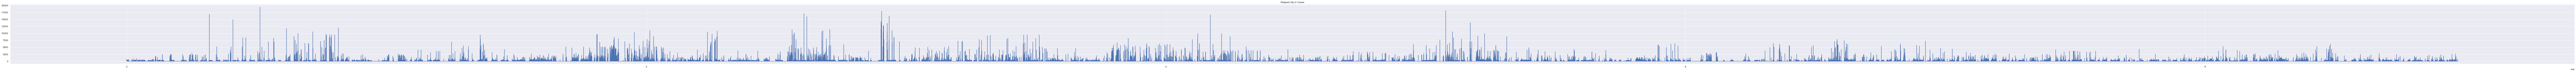

In [33]:
df_ts.invc_qty_cs.plot(figsize = (200,5), title = "Shipped Qty in Cases")
plt.show()

In [34]:
df_ts.tms_load_id.isna().any()

True

In [35]:
df_ts[df_ts['tms_load_id'].isna()].iloc[:,12:27]

,tms_load_id,invc_create_dt,sls_itm_subtotal_3,sls_itm_catg,invc_itm_gross_weight,invc_itm_volume,DisplayItemFlag,ct_match,line_ct_charges,line_glo_charges,fiscal_yr_mo,kc_trim,invc_qty_ea,invc_qty_cs
2242890,NaN,2020-05-11,2024,TAN,115,16,0,n,0,0,2020-05-01,48176901,46,46
2242891,NaN,2020-05-11,2024,TAN,115,16,0,y,0,0,2020-05-01,48176901,46,46
2242892,NaN,2020-05-11,13559,TAN,3380,474,0,n,0,0,2020-05-01,48176901,321,321
2242893,NaN,2020-05-11,13559,TAN,3380,474,0,y,3,0,2020-05-01,48176901,321,321
2242894,NaN,2020-05-11,2574,TAN,610,78,0,n,0,0,2020-05-01,48176901,65,65
2242895,NaN,2020-05-11,2574,TAN,610,78,0,y,1,0,2020-05-01,48176901,65,65
6581950,NaN,2020-08-04,1386,TAN,240,34,0,n,0,0,2020-08-01,48176901,105,35
6581951,NaN,2020-08-04,1386,TAN,240,34,0,y,4,0,2020-08-01,48176901,105,35


In [36]:
df_ts.invc_qty_cs.mean()

13.770645362916278

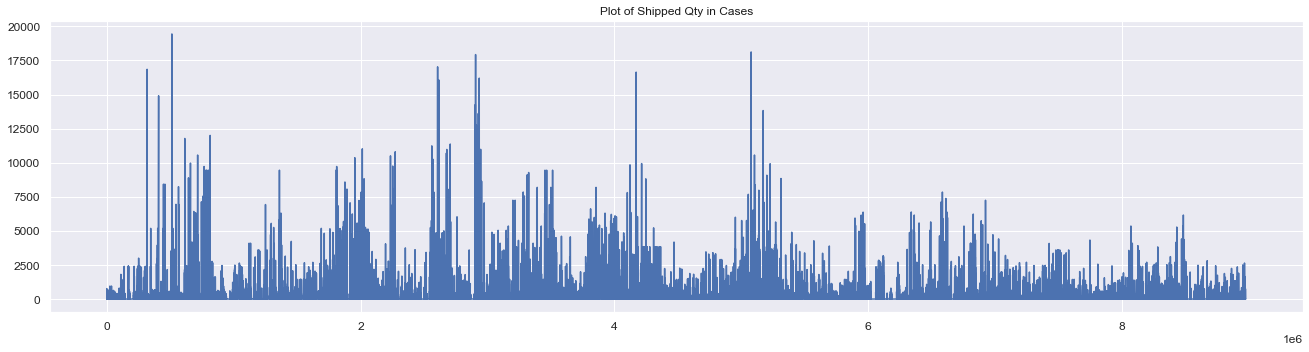

In [37]:
df_ts.invc_qty_cs.plot(figsize=(20,5),title="Plot of Shipped Qty in Cases")
plt.show()

In [38]:
df_ts.columns

Index(['RecordID', 'vics_bol_num', 'shpmt_doc_num', 'purch_ord_num',
       'sls_ord_num', 'dlvry_doc_num', 'sold_to_num', 'ship_to_num',
       'matl_num', 'invc_num', 'sls_doc_typ', 'plant_cd', 'tms_load_id',
       'invc_create_dt', 'sls_itm_subtotal_3', 'sls_itm_catg',
       'invc_itm_gross_weight', 'invc_itm_volume', 'DisplayItemFlag',
       'ct_match', 'line_ct_charges', 'line_glo_charges', 'fiscal_yr_mo',
       'kc_trim', 'invc_qty_ea', 'invc_qty_cs'],
      dtype='object')

In [39]:
columns = ['RecordID', 'vics_bol_num', 'shpmt_doc_num', 'purch_ord_num',
       'sls_ord_num', 'dlvry_doc_num', 'sold_to_num', 'ship_to_num', 'invc_num', 'sls_doc_typ', 'tms_load_id', 'sls_itm_subtotal_3', 'sls_itm_catg',
       'invc_itm_gross_weight', 'invc_itm_volume', 'DisplayItemFlag',
       'ct_match', 'line_ct_charges', 'line_glo_charges',
       'kc_trim', 'invc_qty_ea']

In [40]:
df_ts1 = df_ts.copy()
df_ts1.drop(columns, axis =1, inplace=True)

In [41]:
df_ts1.head()

,matl_num,plant_cd,invc_create_dt,fiscal_yr_mo,invc_qty_cs
0,111672475,US16,2019-12-30,2020-01-01,174
1,111747900,US16,2019-12-30,2020-01-01,127
2,111756100,US16,2019-12-30,2020-01-01,82
3,111756800,US16,2019-12-30,2020-01-01,118
4,111774700,US16,2019-12-30,2020-01-01,339


In [42]:
df_ts1.isnull().sum()

matl_num          0
plant_cd          0
invc_create_dt    0
fiscal_yr_mo      0
invc_qty_cs       0
dtype: int64

In [43]:
df_ts2 = df_ts1.groupby(['fiscal_yr_mo','plant_cd','matl_num'])['invc_qty_cs'].sum().reset_index()

In [51]:
df_ts2.head()

,fiscal_yr_mo,plant_cd,matl_num,invc_qty_cs
0,2020-01-01,US11,32043000,0
1,2020-01-01,US11,32043001,0
2,2020-01-01,US11,32043200,0
3,2020-01-01,US11,32043201,0
4,2020-01-01,US11,32043600,0


In [52]:
plant_codes = df_ts2.plant_cd.unique()

In [53]:
df_ts3 = df_ts2.set_index('fiscal_yr_mo')

In [54]:
df_ts3.head()

,plant_cd,matl_num,invc_qty_cs
fiscal_yr_mo,,,
2020-01-01,US11,32043000,0
2020-01-01,US11,32043001,0
2020-01-01,US11,32043200,0
2020-01-01,US11,32043201,0
2020-01-01,US11,32043600,0


In [55]:
df_ts3.columns

Index(['plant_cd', 'matl_num', 'invc_qty_cs'], dtype='object')

In [ ]:
df_ts5 = df_ts3.copy()
df_ts_excl_US11 = df_ts5.drop(df_ts5[df_ts5.plant_cd.isin(["US11"])].index)

In [ ]:
df_ts_excl_US11.head()

In [ ]:
df_ts4 = df_ts2.copy()
# df_ts4 = df_ts4.drop(['plant_cd','matl_num'], axis =1, inplace=True)
df_ts4.drop(['plant_cd','matl_num'], axis =1, inplace=True)
df_ts4

In [ ]:
# Group the data by Order Date for sum of Sales
plant_cd_data = df_ts2.groupby(['fiscal_yr_mo','plant_cd'])['invc_qty_cs'].sum().reset_index()
plant_cd_data
plant_cd_data = plant_cd_data.set_index('fiscal_yr_mo')

In [ ]:
plant_cd_data.head()

In [ ]:
plant_cd_data.describe()

In [70]:
df_tot_qty_mon = df_ts2.groupby(['fiscal_yr_mo'])['invc_qty_cs'].sum().reset_index()
df_tot_qty_mon= df_tot_qty_mon.set_index('fiscal_yr_mo')

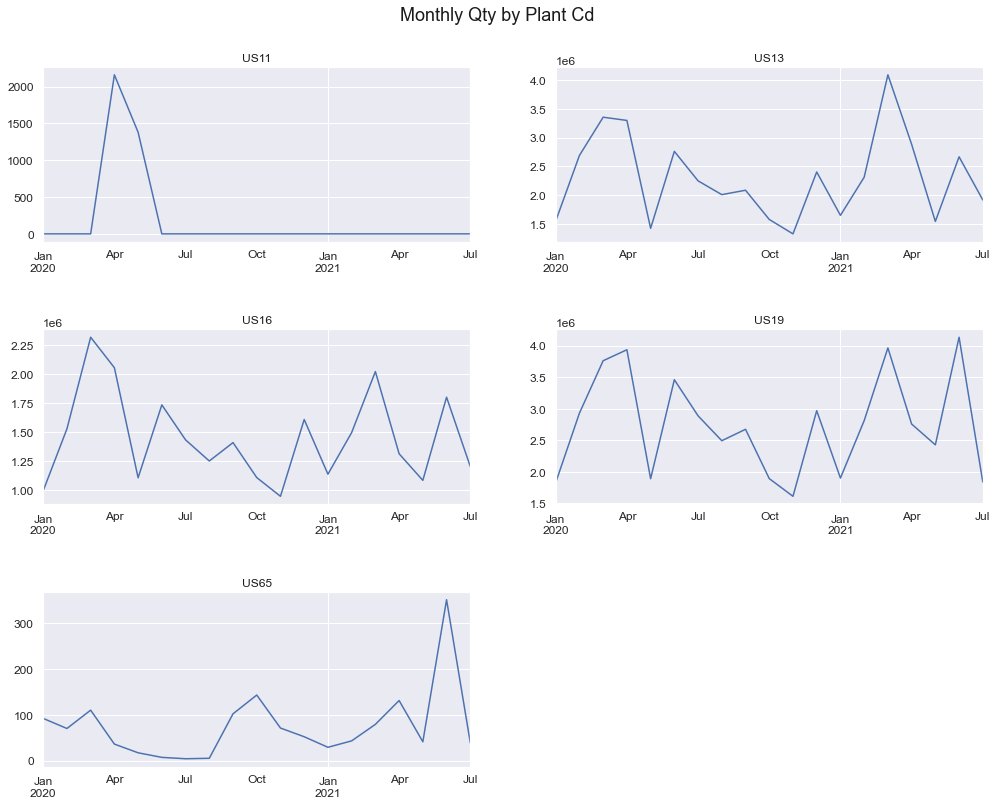

In [57]:
# plt.style.use('classic')
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Monthly Qty by Plant Cd", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, plant_code in enumerate(plant_codes):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    # filter df and plot ticker on the new subplot axis
    df_plnt_cd_mon_qty = plant_cd_data[plant_cd_data["plant_cd"] == plant_code]
#     print(df_plnt_cd)
    df_plnt_cd_mon_qty.invc_qty_cs.plot(ax=ax)
#     (ax=ax)

    # chart formatting
    ax.set_title(plant_code.upper())
#     ax.get_legend().remove()
    ax.set_xlabel("")
#     plt.show()

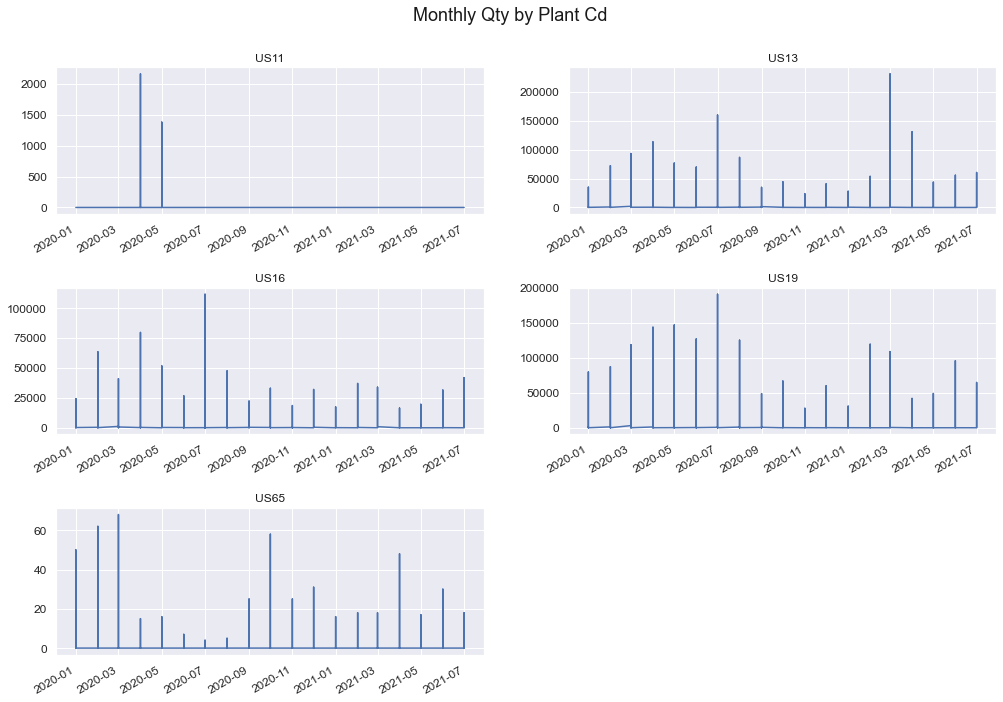

In [54]:
# plt.style.use('classic')
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Monthly Qty by Plant Cd", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, plant_code in enumerate(plant_codes):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    # filter df and plot ticker on the new subplot axis
    df_plnt_cd = df_ts3[df_ts3["plant_cd"] == plant_code]
#     print(df_plnt_cd)
    df_plnt_cd.invc_qty_cs.plot(ax=ax)
#     (ax=ax)

    # chart formatting
    ax.set_title(plant_code.upper())
#     ax.get_legend().remove()
    ax.set_xlabel("")
#     plt.show()

In [97]:
df_ts4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303430 entries, 0 to 303429
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   fiscal_yr_mo  303430 non-null  datetime64[ns]
 1   invc_qty_cs   303430 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.6 MB


In [98]:
df_ts4.index

RangeIndex(start=0, stop=303430, step=1)

In [99]:
df_ts4 = df_ts4.set_index('fiscal_yr_mo')

In [102]:
df_ts4.sort_index(inplace=True)
df_ts4

,invc_qty_cs
fiscal_yr_mo,
2020-01-01,0
2020-01-01,0
2020-01-01,0
2020-01-01,0
2020-01-01,0
...,...
2021-07-01,0
2021-07-01,0
2021-07-01,0


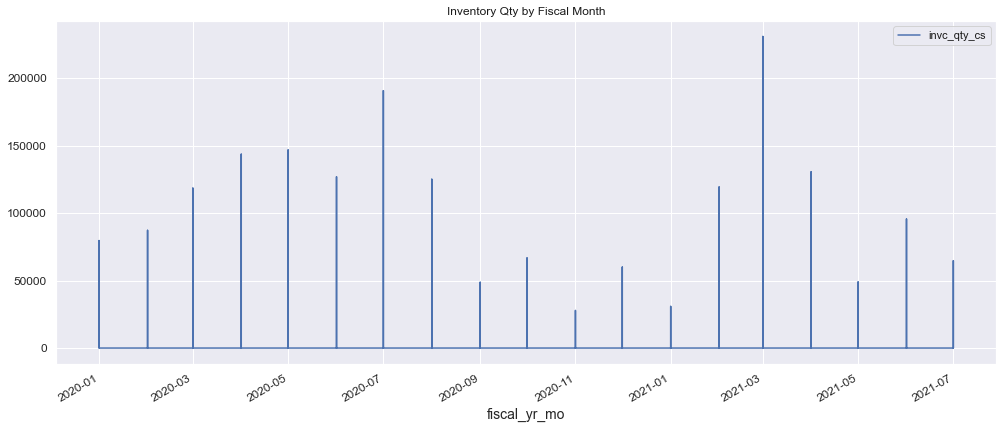

In [104]:
df_ts4.plot(figsize=(15,7), title='Inventory Qty by Fiscal Month')
plt.show()

In [109]:
df_ts_freq_month = df_ts4['invc_qty_cs'].resample('MS').mean()

In [115]:
# df_ts_sum_mon = df_ts4['invc_qty_cs'].resample('M').aggregate()

In [111]:
df_ts_freq_month

fiscal_yr_mo
2020-01-01   274
2020-02-01   448
2020-03-01   591
2020-04-01   582
2020-05-01   277
2020-06-01   498
2020-07-01   412
2020-08-01   360
2020-09-01   387
2020-10-01   287
2020-11-01   244
2020-12-01   437
2021-01-01   294
2021-02-01   415
2021-03-01   631
2021-04-01   436
2021-05-01   317
2021-06-01   539
2021-07-01   311
Freq: MS, Name: invc_qty_cs, dtype: float64

In [112]:
df_ts_sum_mon

fiscal_yr_mo
2020-01-01    15970
2020-02-01    15970
2020-03-01    15970
2020-04-01    15970
2020-05-01    15970
2020-06-01    15970
2020-07-01    15970
2020-08-01    15970
2020-09-01    15970
2020-10-01    15970
2020-11-01    15970
2020-12-01    15970
2021-01-01    15970
2021-02-01    15970
2021-03-01    15970
2021-04-01    15970
2021-05-01    15970
2021-06-01    15970
2021-07-01    15970
Freq: MS, Name: invc_qty_cs, dtype: int64

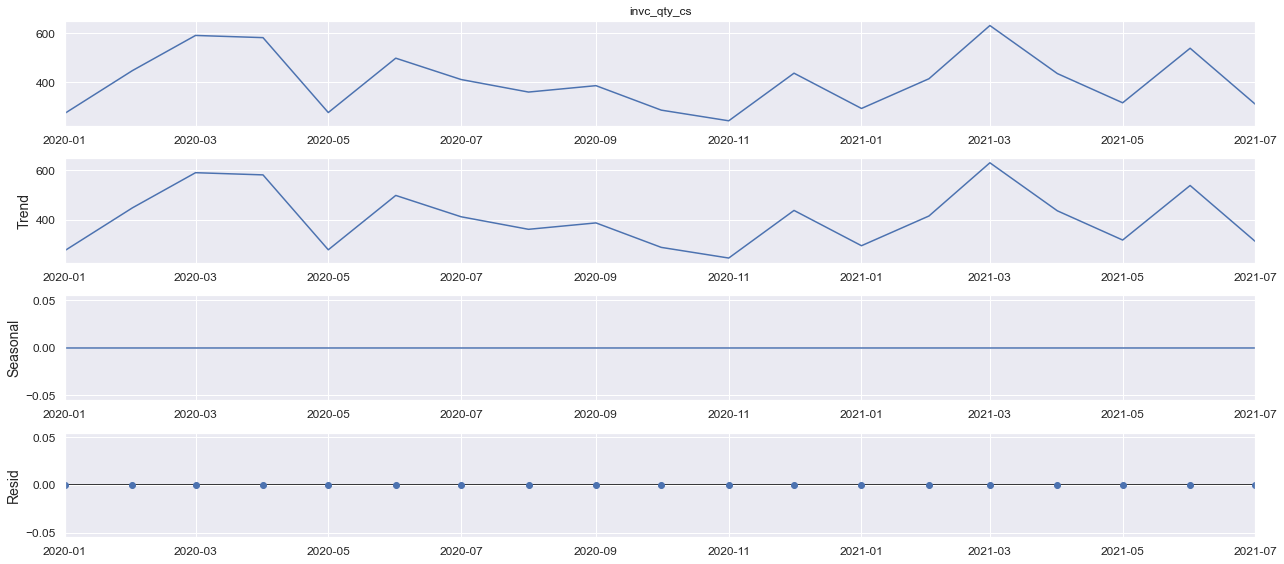

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_ts_freq_month, model='additive', period=1)
fig = decomposition.plot()
plt.show()

In [58]:
df_ts4.invc_qty_cs.duplicated()

fiscal_yr_mo
2020-01-01    False
2020-01-01     True
2020-01-01     True
2020-01-01     True
2020-01-01     True
              ...  
2021-07-01     True
2021-07-01     True
2021-07-01     True
2021-07-01     True
2021-07-01     True
Name: invc_qty_cs, Length: 303430, dtype: bool

In [59]:
df.invc_qty_cs.is_unique

False

In [60]:
df_ts4.head()

,invc_qty_cs
fiscal_yr_mo,
2020-01-01,0
2020-01-01,0
2020-01-01,0
2020-01-01,0
2020-01-01,0


In [61]:
df_ts3_US16 = df_ts3[(df_ts3['plant_cd'] == 'US16') & (df_ts3['matl_num']== 32043000)]
df_ts3_US16.head()

,plant_cd,matl_num,invc_qty_cs
fiscal_yr_mo,,,
2020-01-01,US16,32043000,336
2020-02-01,US16,32043000,394
2020-03-01,US16,32043000,1119
2020-04-01,US16,32043000,156
2020-05-01,US16,32043000,69


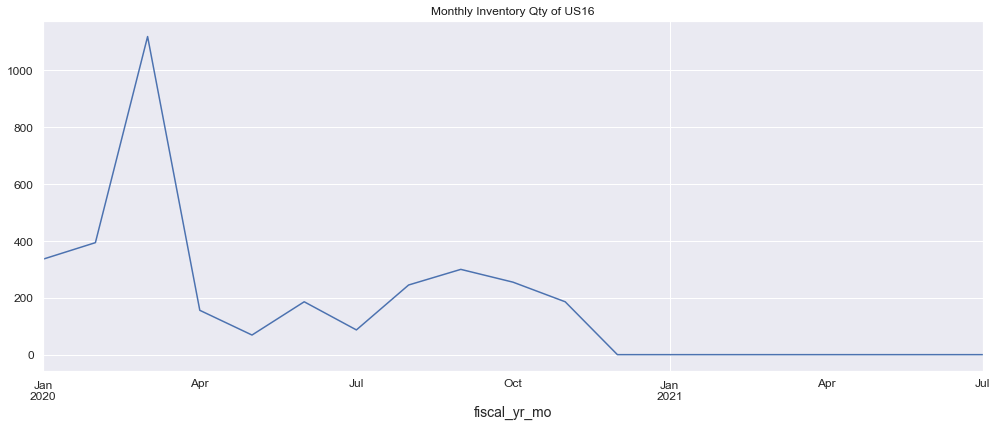

In [62]:
df_ts3_US16.invc_qty_cs.plot(figsize=(15,6),title="Monthly Inventory Qty of US16")
plt.show()

In [71]:
train_len = 16
train = df_tot_qty_mon[0 : train_len]
test = df_tot_qty_mon[train_len : ]

In [73]:
train

,invc_qty_cs
fiscal_yr_mo,
2020-01-01,4377978
2020-02-01,7151121
2020-03-01,9435011
2020-04-01,9292725
2020-05-01,4426346
2020-06-01,7958248
2020-07-01,6572461
2020-08-01,5756874
2020-09-01,6172744


In [74]:
test

,invc_qty_cs
fiscal_yr_mo,
2021-05-01,5059493
2021-06-01,8603541
2021-07-01,4961294


### Naive Method

In [75]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['invc_qty_cs'][train_len-1]

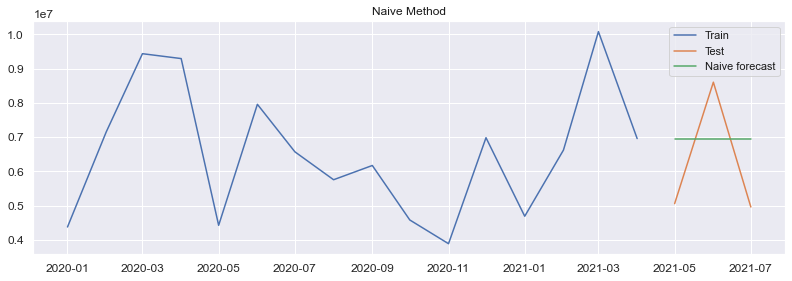

In [77]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['invc_qty_cs'], label='Train')
plt.plot(test['invc_qty_cs'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [78]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['invc_qty_cs'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['invc_qty_cs']-y_hat_naive['naive_forecast'])/test['invc_qty_cs'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1853023,32


### Simple Average Method

In [79]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['invc_qty_cs'].mean()

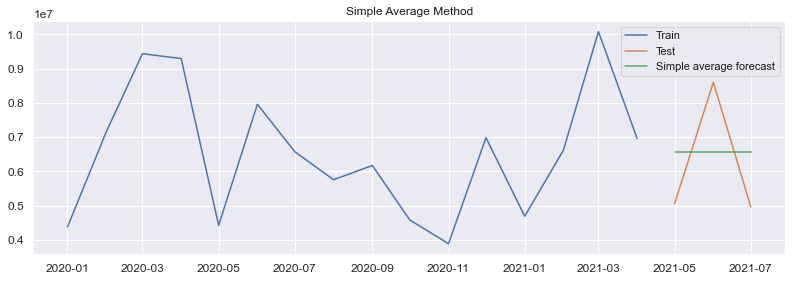

In [80]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['invc_qty_cs'], label='Train')
plt.plot(test['invc_qty_cs'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [81]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['invc_qty_cs'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['invc_qty_cs']-y_hat_avg['avg_forecast'])/test['invc_qty_cs'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1853023,32
0,Simple average method,1730342,29


#### Simple Exponential Smoothing

In [82]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['invc_qty_cs'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

/Users/satavisha/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/satavisha/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


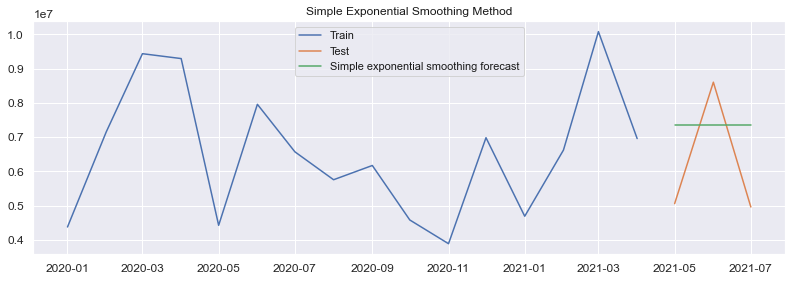

In [84]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['invc_qty_cs'], label='Train')
plt.plot(test['invc_qty_cs'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [85]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['invc_qty_cs'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['invc_qty_cs']-y_hat_ses['ses_forecast'])/test['invc_qty_cs'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1853023,32
0,Simple average method,1730342,29
0,Simple exponential smoothing forecast,2042383,36
0,Simple exponential smoothing forecast,2042383,36


### Holt's Method with Trend

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['invc_qty_cs']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5471428571428572, 'smoothing_trend': 0.5471428571428572, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 4377978.0, 'initial_trend': 2773143.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/satavisha/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


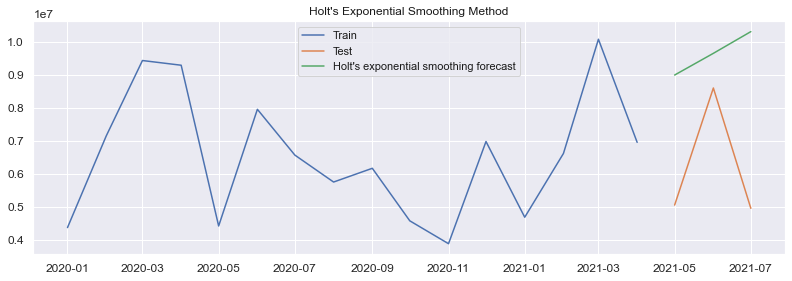

In [87]:
# Plot train, test, forecast
plt.figure(figsize=(12,4))
plt.plot( train['invc_qty_cs'], label='Train')
plt.plot(test['invc_qty_cs'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [88]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['invc_qty_cs'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['invc_qty_cs']-y_hat_holt['holt_forecast'])/test['invc_qty_cs'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1853023,32
0,Simple average method,1730342,29
0,Simple exponential smoothing forecast,2042383,36
0,Simple exponential smoothing forecast,2042383,36
0,Holt's exponential smoothing method,3881703,66


### Auto-regressive method

#### To chech whether time series is stationary

#### Augmented Dickey-Fuller (ADF) Test 

In [89]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_tot_qty_mon['invc_qty_cs'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -2.830509
Critical Values @ 0.05: -3.15
p-value: 0.054046


#### Since p-value is >  0.05, it means that the series **is** stationary.

In [63]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [1]:
df_pred_ts = pd.read_csv("./forecast_data/forecasat_data/hackers_predict_forecast.csv")

NameError: name 'pd' is not defined

In [ ]:
df_pred_ts.columns

In [ ]:
df_pred_ts['invc_create_dt'] = pd.to_datetime(df_pred_ts['invc_create_dt'])

In [ ]:
df_pred_ts['fiscal_yr_mo'] = pd.to_datetime(df_pred_ts['fiscal_yr_mo'])

In [ ]:
df_pred_ts['invc_create_dt'].min(), df_pred_ts['invc_create_dt'].max()

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [ ]:
df_comp['market_value']=df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [ ]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [ ]:
df['wn'] = wn

In [ ]:
df.describe()

In [ ]:
df.wn.plot()
plt.title("white noise Time-Series", size=24)
plt.show()

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size =24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [ ]:
rw = pd.read_csv("Randwalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [ ]:
rw.describe()

In [ ]:
df['rw'] = rw.price

In [ ]:
df.head()

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random walk vs S&P", size = 24)
plt.show()

### Stationarity

In [ ]:
sts.adfuller(df.market_value)

In [ ]:
sts.adfuller(df.wn)

In [ ]:
sts.adfuller(df.rw)

### Seasonality

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

### ACF

### PACF